# UFC Automated Scoring

The goal of this notebook is to:
* Read in stored, scraped UFC data and convert it into a dataset ready for ML models
* Train, test, and analyze ML models

Functional as of April 2021

## Read in stored data

In [1]:
import numpy as np
import pandas as pd

In [2]:
STORED_FIGHT_TABLE = pd.read_csv('data/April_22_2021_better_data/FIGHT_TABLE_NUM_EVENTS_All_DATA_MODE_Summary_22-04-2021_11:08:22.csv')

In [3]:
STORED_FIGHT_TABLE

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
0,0,0,150,62,52.0,29.0,169,70,4,1,...,22,13,138,59,5,3,7,0,0,U-DEC
1,0,0,105,88,47.0,45.0,109,99,0,0,...,25,17,103,84,2,4,0,0,0,U-DEC
2,0,0,21,27,44.0,49.0,32,91,0,8,...,1,1,14,18,5,3,2,6,1,U-DEC
3,0,1,66,55,58.0,46.0,84,72,3,0,...,7,17,39,50,7,4,20,1,0,S-DEC
4,0,0,90,80,46.0,47.0,90,82,0,4,...,4,20,88,77,2,3,0,0,0,S-DEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,2,0,24,16,68.0,33.0,49,31,0,1,...,12,0,17,7,4,4,3,5,0,KO/TKO Punch
5889,0,0,19,24,55.0,55.0,95,145,1,2,...,5,2,4,1,15,23,0,0,0,S-DEC
5890,0,0,14,13,35.0,19.0,30,15,3,0,...,3,0,11,12,0,1,3,0,0,U-DEC
5891,0,0,9,3,56.0,60.0,17,11,1,0,...,2,0,2,0,5,3,2,0,0,SUB Guillotine Choke


In [263]:
# Clean dataset: Only decisions with clear winners
STORED_FIGHT_TABLE = STORED_FIGHT_TABLE[STORED_FIGHT_TABLE["Method"].str.contains("DEC")]
STORED_FIGHT_TABLE = STORED_FIGHT_TABLE[(STORED_FIGHT_TABLE["Winner"] == 1) | (STORED_FIGHT_TABLE["Winner"] == 0)]
STORED_FIGHT_TABLE

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
0,0,0,150,62,52.0,29.0,169,70,4,1,...,22,13,138,59,5,3,7,0,0,U-DEC
1,0,0,105,88,47.0,45.0,109,99,0,0,...,25,17,103,84,2,4,0,0,0,U-DEC
2,0,0,21,27,44.0,49.0,32,91,0,8,...,1,1,14,18,5,3,2,6,1,U-DEC
3,0,1,66,55,58.0,46.0,84,72,3,0,...,7,17,39,50,7,4,20,1,0,S-DEC
4,0,0,90,80,46.0,47.0,90,82,0,4,...,4,20,88,77,2,3,0,0,0,S-DEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,0,27,19,38.0,21.0,71,21,3,1,...,14,13,20,16,2,2,5,1,0,U-DEC
5881,0,0,16,25,55.0,47.0,29,58,0,2,...,7,2,15,7,1,0,0,18,0,S-DEC
5883,1,0,42,34,31.0,53.0,57,41,0,0,...,5,13,21,20,19,14,2,0,0,U-DEC
5889,0,0,19,24,55.0,55.0,95,145,1,2,...,5,2,4,1,15,23,0,0,0,S-DEC


In [355]:
X = STORED_FIGHT_TABLE.drop(['Winner', 'Fighter 0 Name', 'Fighter 1 Name', 'Method'], axis=1).fillna(0)
y = STORED_FIGHT_TABLE[['Winner']]

In [359]:
X

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Body,Fighter 1 Body,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground
0,0,0,150,62,52.0,29.0,169,70,4,1,...,13,7,22,13,138,59,5,3,7,0
1,0,0,105,88,47.0,45.0,109,99,0,0,...,26,16,25,17,103,84,2,4,0,0
2,0,0,21,27,44.0,49.0,32,91,0,8,...,9,2,1,1,14,18,5,3,2,6
3,0,1,66,55,58.0,46.0,84,72,3,0,...,19,8,7,17,39,50,7,4,20,1
4,0,0,90,80,46.0,47.0,90,82,0,4,...,12,20,4,20,88,77,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,0,0,27,19,38.0,21.0,71,21,3,1,...,4,1,14,13,20,16,2,2,5,1
5881,0,0,16,25,55.0,47.0,29,58,0,2,...,0,0,7,2,15,7,1,0,0,18
5883,1,0,42,34,31.0,53.0,57,41,0,0,...,9,14,5,13,21,20,19,14,2,0
5889,0,0,19,24,55.0,55.0,95,145,1,2,...,12,20,5,2,4,1,15,23,0,0


In [358]:
y

,Winner
0,0
1,0
2,1
3,0
4,0
...,...
5880,0
5881,0
5883,0
5889,0


## Setup train/validate/test split with data augmentation

TODO: Add in smarter data augmentation that create new datapoints nearby.

In [267]:
def create_flipped_table(table):
    '''Rearranges columns of table so that each fight has two rows. Let fighters be A and B.
       One row has (Fighter 0 = A, Fighter 1 = B). One row has (Fighter 0 = B, Fighter 1 = A)
       Ensure same column order, as column names not looked at when passed to ML model'''

    # Get columns in flipped order, which moves the columns around, but changes column name order too
    flipped_columns = []
    for column in table.columns:
        if "Fighter 0" in column:
            flipped_columns.append(column.replace("Fighter 0", "Fighter 1"))
        elif "Fighter 1" in column:
            flipped_columns.append(column.replace("Fighter 1", "Fighter 0"))
        else:
            flipped_columns.append(column)
    flipped_table = table[flipped_columns]

    # Flips winners around
    if 'Winner' in flipped_table.columns:
         flipped_table['Winner'] = flipped_table['Winner'].replace([0, 1], [1, 0])

    # Change column names back to normal
    flipped_table.columns = table.columns
    return flipped_table


def add_rows_of_flipped_columns(table):
    flipped_table = create_flipped_table(table)
    new_table = pd.concat([table, flipped_table])
    return new_table

In [360]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=0)
X_train, y_train = add_rows_of_flipped_columns(X_train), add_rows_of_flipped_columns(y_train)
X_valid, y_valid = add_rows_of_flipped_columns(X_valid), add_rows_of_flipped_columns(y_valid)
X_test, y_test = add_rows_of_flipped_columns(X_test), add_rows_of_flipped_columns(y_test)

In [361]:
# Expect equal number of examples in Fighter 0 as Fighter 1
assert(len(y_train[y_train['Winner'] == 0]) == len(y_train[y_train['Winner'] == 1]))
assert(len(y_valid[y_valid['Winner'] == 0]) == len(y_valid[y_valid['Winner'] == 1]))
assert(len(y_test[y_test['Winner'] == 0]) == len(y_test[y_test['Winner'] == 1]))

In [362]:
X_train

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Body,Fighter 1 Body,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground
1730,0,0,33,66,33.0,39.0,76,81,1,4,...,8,19,3,14,31,53,2,8,0,5
4671,0,0,28,14,31.0,25.0,83,27,1,3,...,8,6,3,6,9,9,15,3,4,2
2465,0,0,104,27,67.0,37.0,193,32,7,0,...,26,4,5,0,24,20,32,5,48,2
2417,0,0,39,94,34.0,54.0,67,140,4,0,...,7,9,12,3,38,94,0,0,1,0
5204,1,0,26,16,39.0,40.0,79,155,2,1,...,3,2,0,3,4,14,2,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,0,0,87,87,34.0,41.0,87,98,0,0,...,16,14,11,15,80,84,7,3,0,0
2849,0,0,42,35,43.0,49.0,98,43,1,9,...,14,4,1,1,20,18,20,5,2,12
2057,0,0,50,18,54.0,50.0,96,52,1,6,...,16,1,7,7,31,9,1,1,18,8
26,0,0,71,27,47.0,39.0,131,32,3,2,...,14,10,3,1,48,26,4,1,19,0


In [363]:
y_train

,Winner
1730,1
4671,0
2465,0
2417,1
5204,0
...,...
2949,0
2849,1
2057,0
26,0


In [272]:
print(f"X_train.shape = {X_train.shape}")
print(f"X_valid.shape = {X_valid.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_valid.shape = {y_valid.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (2408, 30)
X_valid.shape = (1188, 30)
X_test.shape = (1774, 30)
y_train.shape = (2408, 1)
y_valid.shape = (1188, 1)
y_test.shape = (1774, 1)


## Train and test ML models

### Random forest

/home/tylerlum/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


accuracy_train = 0.8945182724252492
accuracy_valid = 0.8392255892255892


<BarContainer object of 30 artists>

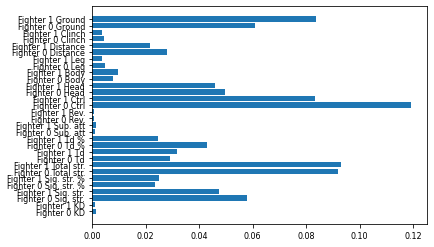

In [534]:
from sklearn.ensemble import RandomForestClassifier

# Train
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)

# Validate
accuracy_train = clf.score(X_train, y_train)
accuracy_valid = clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

# Visualize importances
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
plt.barh(X_train.columns, clf.feature_importances_)

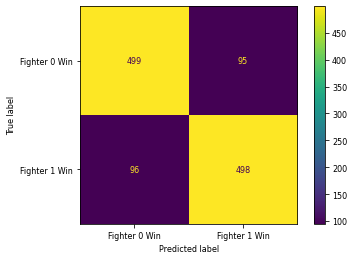

In [535]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
predIdxs = np.where(clf.predict(X_valid) > 0.5, 1, 0)
trueIdxs = y_valid
cm = confusion_matrix(trueIdxs, predIdxs)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fighter 0 Win", "Fighter 1 Win"])
cmDisplay.plot()

### MLP

In [537]:
# MLP
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
accuracy_train = clf.score(X_train, y_train)
accuracy_valid = clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/home/tylerlum/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy_train = 0.7657807308970099
accuracy_valid = 0.7617845117845118


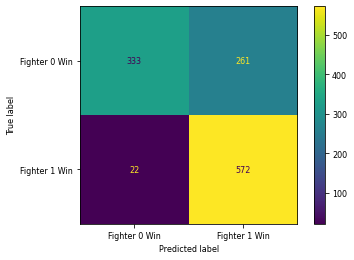

In [538]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
predIdxs = np.where(clf.predict(X_valid) > 0.5, 1, 0)
trueIdxs = y_valid
cm = confusion_matrix(trueIdxs, predIdxs)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fighter 0 Win", "Fighter 1 Win"])
cmDisplay.plot()

### SVM

In [539]:
# SVM
from sklearn.svm import SVC

clf = SVC(random_state=1).fit(X_train, y_train)
accuracy_train = clf.score(X_train, y_train)
accuracy_valid = clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/home/tylerlum/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy_train = 0.8567275747508306
accuracy_valid = 0.8333333333333334


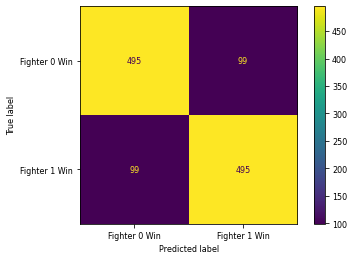

In [540]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
predIdxs = np.where(clf.predict(X_valid) > 0.5, 1, 0)
trueIdxs = y_valid
cm = confusion_matrix(trueIdxs, predIdxs)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fighter 0 Win", "Fighter 1 Win"])
cmDisplay.plot()

### Deep model

In [542]:
# FFN
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 32)                992       
_________________________________________________________________
dense_160 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 33        
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [543]:
H = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
model.evaluate(X_train, y_train)
model.evaluate(X_valid, y_valid)

Train on 2408 samples, validate on 1188 samples
Epoch 1/100
2408/2408 [==============================] - 1s 294us/sample - loss: 4.0546 - acc: 0.6902 - val_loss: 1.3626 - val_acc: 0.7778
Epoch 2/100
2408/2408 [==============================] - 0s 45us/sample - loss: 1.1124 - acc: 0.7895 - val_loss: 0.8232 - val_acc: 0.8098
Epoch 3/100
2408/2408 [==============================] - 0s 47us/sample - loss: 0.7917 - acc: 0.8086 - val_loss: 0.7362 - val_acc: 0.8022
Epoch 4/100
2408/2408 [==============================] - 0s 46us/sample - loss: 0.6274 - acc: 0.8123 - val_loss: 0.7293 - val_acc: 0.7862
Epoch 5/100
2408/2408 [==============================] - 0s 46us/sample - loss: 0.6399 - acc: 0.8106 - val_loss: 0.6043 - val_acc: 0.8199
Epoch 6/100
2408/2408 [==============================] - 0s 46us/sample - loss: 0.5200 - acc: 0.8231 - val_loss: 0.5364 - val_acc: 0.8173
Epoch 7/100
2408/2408 [==============================] - 0s 45us/sample - loss: 0.4983 - acc: 0.8214 - val_loss: 0.5639 - v

2408/2408 [==============================] - 0s 42us/sample - loss: 0.2985 - acc: 0.8771 - val_loss: 0.4826 - val_acc: 0.8325
Epoch 60/100
2408/2408 [==============================] - 0s 44us/sample - loss: 0.2638 - acc: 0.8870 - val_loss: 0.5289 - val_acc: 0.8064
Epoch 61/100
2408/2408 [==============================] - 0s 45us/sample - loss: 0.2739 - acc: 0.8825 - val_loss: 0.4182 - val_acc: 0.8342
Epoch 62/100
2408/2408 [==============================] - 0s 43us/sample - loss: 0.2552 - acc: 0.8924 - val_loss: 0.4230 - val_acc: 0.8325
Epoch 63/100
2408/2408 [==============================] - 0s 44us/sample - loss: 0.2580 - acc: 0.8870 - val_loss: 0.4349 - val_acc: 0.8249
Epoch 64/100
2408/2408 [==============================] - 0s 43us/sample - loss: 0.2601 - acc: 0.8850 - val_loss: 0.4627 - val_acc: 0.8165
Epoch 65/100
2408/2408 [==============================] - 0s 44us/sample - loss: 0.2674 - acc: 0.8812 - val_loss: 0.4183 - val_acc: 0.8316
Epoch 66/100
2408/2408 [================

[0.4429849594931811, 0.84343433]

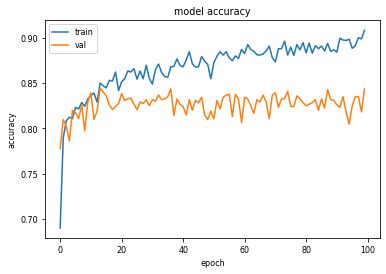

In [544]:
from matplotlib import pyplot as plt
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

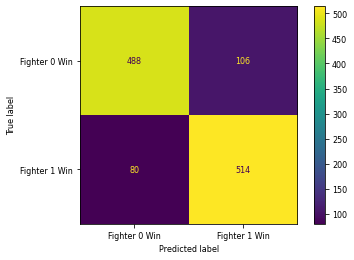

In [546]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
predIdxs = np.where(model.predict(X_valid) > 0.5, 1, 0)
trueIdxs = y_valid
cm = confusion_matrix(trueIdxs, predIdxs)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fighter 0 Win", "Fighter 1 Win"])
cmDisplay.plot()

### Comparison Model

In [547]:
from tensorflow.keras.layers import Input, Lambda, Subtract, Activation
from tensorflow.keras.models import Model
def create_comparison_model(input_shape):
    num_features_per_fighter = input_shape[1]

    model_ = tf.keras.models.Sequential()
    model_.add(tf.keras.Input(shape=num_features_per_fighter))
    model_.add(tf.keras.layers.Dense(32, activation='relu'))
    model_.add(tf.keras.layers.Dropout(0.5))
    model_.add(tf.keras.layers.Dense(32, activation='relu'))
    model_.add(tf.keras.layers.Dropout(0.5))

    model_.add(tf.keras.layers.Dense(1, activation='relu'))
    
    # Run cnn model on each frame
    input_tensor = Input(shape=input_shape)
    fighter0_state = Lambda(lambda x: x[:, 0, :], name='fighter0_state')(input_tensor)
    fighter1_state = Lambda(lambda x: x[:, 1, :], name='fighter1_state')(input_tensor)

    fighter0_score = model_(fighter0_state)
    fighter1_score = model_(fighter1_state)
    fighter0_score = Lambda(lambda x: x, name='fighter0_score')(fighter0_score)
    fighter1_score = Lambda(lambda x: x, name='fighter1_score')(fighter1_score)
    
    difference_score = Subtract(name='subtracter')([fighter1_score, fighter0_score])
    prediction = Activation('sigmoid')(difference_score)
    return Model(inputs=input_tensor, outputs=prediction)

In [548]:
model = create_comparison_model(X_train_new.shape[1:])
# optimizer = tf.keras.optimizers.Adam(lr=0.0001)
# model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_61"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_102 (InputLayer)          [(None, 2, 15)]      0                                            
__________________________________________________________________________________________________
fighter1_state (Lambda)         (None, 15)           0           input_102[0][0]                  
__________________________________________________________________________________________________
fighter0_state (Lambda)         (None, 15)           0           input_102[0][0]                  
__________________________________________________________________________________________________
sequential_54 (Sequential)      (None, 1)            1601        fighter0_state[0][0]             
                                                                 fighter1_state[0][0]      

In [549]:
fighter0_columns = [col for col in X_train.columns if "Fighter 0" in col]
fighter1_columns = [col for col in X_train.columns if "Fighter 1" in col]
print(f"fighter0_columns = {fighter0_columns}")
print(f"fighter1_columns = {fighter1_columns}")

fighter0_columns = ['Fighter 0 KD', 'Fighter 0 Sig. str.', 'Fighter 0 Sig. str. %', 'Fighter 0 Total str.', 'Fighter 0 Td', 'Fighter 0 Td %', 'Fighter 0 Sub. att', 'Fighter 0 Rev.', 'Fighter 0 Ctrl', 'Fighter 0 Head', 'Fighter 0 Body', 'Fighter 0 Leg', 'Fighter 0 Distance', 'Fighter 0 Clinch', 'Fighter 0 Ground']
fighter1_columns = ['Fighter 1 KD', 'Fighter 1 Sig. str.', 'Fighter 1 Sig. str. %', 'Fighter 1 Total str.', 'Fighter 1 Td', 'Fighter 1 Td %', 'Fighter 1 Sub. att', 'Fighter 1 Rev.', 'Fighter 1 Ctrl', 'Fighter 1 Head', 'Fighter 1 Body', 'Fighter 1 Leg', 'Fighter 1 Distance', 'Fighter 1 Clinch', 'Fighter 1 Ground']


In [560]:
X0_train = X_train[fighter0_columns]
X1_train = X_train[fighter1_columns]
X0_valid = X_valid[fighter0_columns]
X1_valid = X_valid[fighter1_columns]
X0_test = X_test[fighter0_columns]
X1_test = X_test[fighter1_columns]

In [564]:
X_train_new = np.swapaxes(np.array([X0_train, X1_train]), 0, 1)
X_valid_new = np.swapaxes(np.array([X0_valid, X1_valid]), 0, 1)
X_test_new = np.swapaxes(np.array([X0_test, X1_test]), 0, 1)
normalizing_constants = np.max(X_train_new, axis=0)
X_train_new *= 1/ normalizing_constants
X_valid_new *= 1/ normalizing_constants
X_test_new *= 1/ normalizing_constants
print(X_train_new.shape)
print(X_valid_new.shape)
print(X_test_new.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(2408, 2, 15)
(1188, 2, 15)
(1774, 2, 15)
(2408, 1)
(1188, 1)
(1774, 1)


In [565]:
H = model.fit(X_train_new, y_train, epochs=100, validation_data=(X_valid_new, y_valid))

Train on 2408 samples, validate on 1188 samples
Epoch 1/100
2408/2408 [==============================] - 0s 58us/sample - loss: 0.3226 - acc: 0.8547 - val_loss: 0.3492 - val_acc: 0.8418
Epoch 2/100
2408/2408 [==============================] - 0s 53us/sample - loss: 0.3234 - acc: 0.8588 - val_loss: 0.3522 - val_acc: 0.8401
Epoch 3/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.3260 - acc: 0.8563 - val_loss: 0.3490 - val_acc: 0.8418
Epoch 4/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.3337 - acc: 0.8463 - val_loss: 0.3498 - val_acc: 0.8384
Epoch 5/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.3268 - acc: 0.8576 - val_loss: 0.3519 - val_acc: 0.8359
Epoch 6/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.3214 - acc: 0.8654 - val_loss: 0.3496 - val_acc: 0.8451
Epoch 7/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.3248 - acc: 0.8567 - val_loss: 0.3492 - va

2408/2408 [==============================] - 0s 62us/sample - loss: 0.3053 - acc: 0.8663 - val_loss: 0.3602 - val_acc: 0.8468
Epoch 60/100
2408/2408 [==============================] - 0s 53us/sample - loss: 0.3223 - acc: 0.8625 - val_loss: 0.3591 - val_acc: 0.8476
Epoch 61/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.3140 - acc: 0.8588 - val_loss: 0.3614 - val_acc: 0.8493
Epoch 62/100
2408/2408 [==============================] - 0s 51us/sample - loss: 0.3132 - acc: 0.8592 - val_loss: 0.3627 - val_acc: 0.8443
Epoch 63/100
2408/2408 [==============================] - 0s 56us/sample - loss: 0.3069 - acc: 0.8692 - val_loss: 0.3638 - val_acc: 0.8468
Epoch 64/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.3158 - acc: 0.8630 - val_loss: 0.3635 - val_acc: 0.8451
Epoch 65/100
2408/2408 [==============================] - 0s 50us/sample - loss: 0.3053 - acc: 0.8654 - val_loss: 0.3622 - val_acc: 0.8434
Epoch 66/100
2408/2408 [================

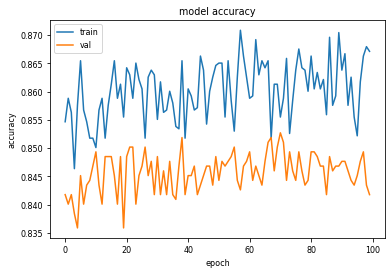

In [567]:
from matplotlib import pyplot as plt
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

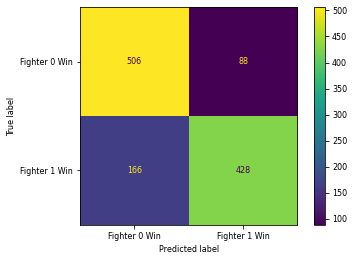

In [568]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
predIdxs = np.where(model.predict(X_valid_new * 1/ np.max(X_valid_new, axis=0)) > 0.5, 1, 0)
trueIdxs = y_valid
cm = confusion_matrix(trueIdxs, predIdxs)
cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fighter 0 Win", "Fighter 1 Win"])
cmDisplay.plot()

In [571]:
lo, hi = 11, 20

In [572]:
X_test_new[lo:hi]

array([[[0.        , 0.28      , 0.48387097, 0.30434783, 0.04761905,
         1.        , 0.        , 0.        , 0.21638331, 0.22346369,
         0.28125   , 0.06410256, 0.20197044, 0.09473684, 0.16666667],
        [0.        , 0.15111111, 0.4516129 , 0.22101449, 0.04761905,
         0.2       , 0.        , 0.        , 0.11282844, 0.10055866,
         0.125     , 0.1025641 , 0.12807882, 0.03157895, 0.06410256]],

       [[0.        , 0.34222222, 0.47311828, 0.45289855, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.16201117,
         0.4375    , 0.25641026, 0.32019704, 0.08421053, 0.05128205],
        [0.25      , 0.29777778, 0.46236559, 0.32971014, 0.        ,
         0.        , 0.        , 0.        , 0.21483771, 0.11731844,
         0.484375  , 0.19230769, 0.26600985, 0.08421053, 0.06410256]],

       [[0.        , 0.59555556, 0.47311828, 0.48913043, 0.        ,
         0.        , 0.        , 0.        , 0.0015456 , 0.47486034,
         0.5       , 0.217

In [575]:
model.predict(X_test_new[lo:hi])

array([[0.03823698],
       [0.63701975],
       [0.8897426 ],
       [0.04632264],
       [0.1155296 ],
       [0.00388497],
       [0.75731003],
       [0.6882664 ],
       [0.01504146]], dtype=float32)

In [576]:
y_test[lo:hi]

,Winner
1705,0
1058,1
619,1
3465,0
5609,0
2047,0
2097,1
251,1
965,0


In [578]:
subtracter = model.get_layer('subtracter').output
subtracter = Model(model.input, subtracter)
subtracter.predict(X_test_new[lo:hi])

array([[-3.224965 ],
       [ 0.5624523],
       [ 2.0881147],
       [-3.0246937],
       [-2.0354621],
       [-5.546749 ],
       [ 1.1379881],
       [ 0.7920271],
       [-4.181789 ]], dtype=float32)

In [579]:
fighter0_score = model.get_layer('fighter0_score').output
fighter0_score = Model(model.input, fighter0_score)
fighter0_score.predict(X_test_new[lo:hi])

array([[4.9105525],
       [3.3388631],
       [6.356675 ],
       [3.0246937],
       [4.8724713],
       [5.546749 ],
       [3.0378642],
       [1.8676842],
       [6.081793 ]], dtype=float32)

In [580]:
fighter1_score = model.get_layer('fighter1_score').output
fighter1_score = Model(model.input, fighter1_score)
fighter1_score.predict(X_test_new[lo:hi])

array([[1.6855873],
       [3.9013155],
       [8.44479  ],
       [0.       ],
       [2.8370092],
       [0.       ],
       [4.1758523],
       [2.6597114],
       [1.9000039]], dtype=float32)